1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

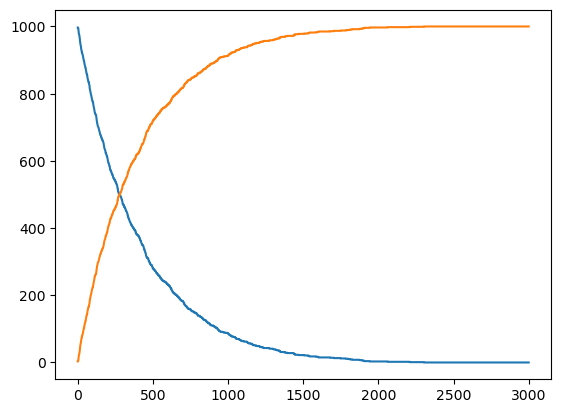

In [2]:
import numpy as np
import matplotlib.pyplot as plt

tHalf = 3.0502*60
tau = tHalf /np.log(2) 
Tl_init, Pb_init = 1000, 0
t = np.arange(0, 3000)
DeltaT = 1

p = lambda t: 1 - 2**(-t/tau)

Atoms = {
   'Tl': [Tl_init],
   'Pb': [Pb_init]
}

for i in t:

   AtmDecayed = np.sum(np.random.rand(Atoms['Tl'][i]) < p(DeltaT))
   Atoms['Tl'].append(Atoms['Tl'][i] - AtmDecayed)
   Atoms['Pb'].append(Atoms['Pb'][i] + AtmDecayed)

plt.plot(t, Atoms['Tl'][1:])
plt.plot(t, Atoms['Pb'][1:])


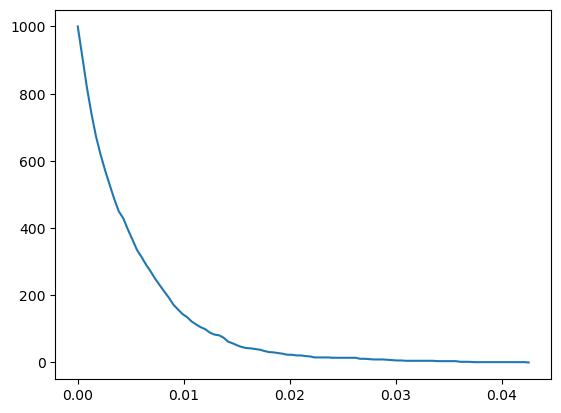

In [3]:
InvFunc = lambda U: np.log2(1 - U)/(-tau)

Decayed = InvFunc(np.random.random(Tl_init))

time = np.linspace(0, np.max(Decayed), 100)
UndecayedCount = [np.sum(Decayed > t) for t in time]

plt.plot(time, UndecayedCount)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
Z = 79  # Atomic number of gold
e = 1.602e-19  # Elementary charge in Coulombs
epsilon_0 = 8.854e-12  # Permittivity of free space in F/m
E = 7.7e6 * e  # Energy in Joules (convert MeV to Joules)
a0 = 5.29177e-11  # Bohr radius in meters
sigma = a0 / 100  # Standard deviation of the normal beam

N = 10_000_000

b_max = Z*e**2 / (2*np.pi*epsilon_0*E)

b_x, b_y = np.random.normal(0, sigma, N), np.random.normal(0, sigma, N)

b = np.sqrt(b_x**2 + b_y**2)

bouncingBack = np.sum(b < b_max)/N

print(f"The number of particle whose angle is grater than pi/2 is: {bouncingBack}")

The number of particle whose angle is grater than pi/2 is: 0.0015612


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [37]:
import tqdm

Function = lambda x: np.sin(1/(x*(2-x)))**2

def HM(Function, N):

   counter = 0
   x = 2*np.random.random(N)
   y = np.random.random(N)

   counter = np.sum(y < Function(x))

   Area = 2/N * counter
   #print(f"The area using the HitMiss method is: {2/N * counter}")
   return Area


def MV(Function, N):

   counter = np.sum(Function(2*np.random.random(N)))

   #print(f"The area using the MeanValue method is: {2/N * counter}") 
   Area = 2/N * counter
   return Area


# N = 1_000_000
# Times = 10_000
# AreaHM, AreaMV = np.zeros(Times), np.zeros(Times)

# for i in tqdm.tqdm(range(10_000)):
#    AreaHM[i] = HM(Function, N)
#    AreaMV[i] = MV(Function, N)

100%|██████████| 10000/10000 [04:11<00:00, 39.78it/s]


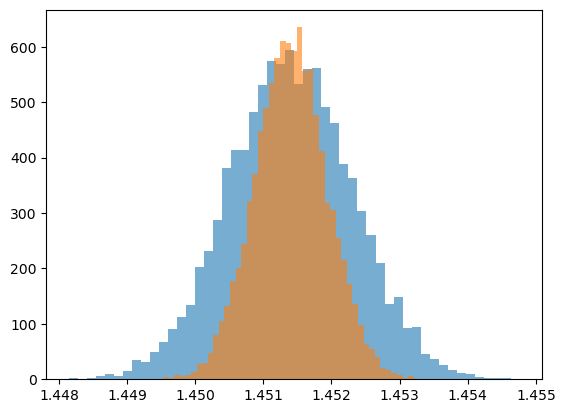

In [ ]:
# plt.hist(AreaHM, alpha=0.6, bins = 50)
# plt.hist(AreaMV, alpha=0.6, bins = 50)
# plt.show()

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

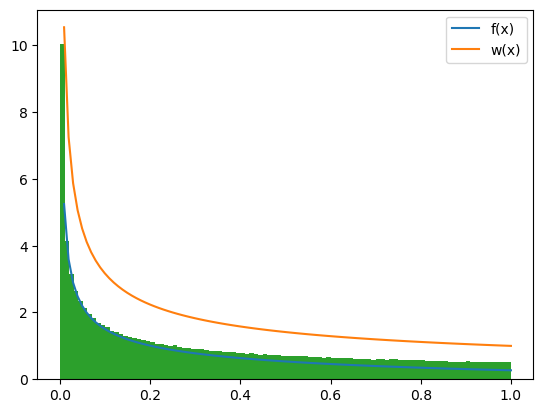

In [12]:
f = lambda x: 1/(np.sqrt(x) * (np.exp(x) + 1))
w = lambda x: 1/np.sqrt(x)

N = 1_000_000

#Random variable distributed as w
RandomX = np.random.random(N)**2
I = 2
Integral = 1/N * np.sum(f(RandomX)/w(RandomX)) * I

x = np.linspace(0.009, 1, 100)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, w(x), label="w(x)")
plt.hist(RandomX, density=True, bins = 100)

plt.legend()
plt.show()